In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wbdata as wb
import datetime as dt
import seaborn as sns
import geopandas as gpd
# import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
# %matplotlib inline

In [ ]:
SMALL_SIZE = 8
MEDIUM_SIZE = 12
BIGGER_SIZE = 17

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [45]:
wb.get_source()

1 	Doing Business
2 	World Development Indicators
3 	Worldwide Governance Indicators
5 	Subnational Malnutrition Database
6 	International Debt Statistics
11	Africa Development Indicators
12	Education Statistics
13	Enterprise Surveys
14	Gender Statistics
15	Global Economic Monitor
16	Health Nutrition and Population Statistics
18	IDA Results Measurement System
19	Millennium Development Goals
20	Quarterly Public Sector Debt
22	Quarterly External Debt Statistics SDDS
23	Quarterly External Debt Statistics GDDS
24	Poverty and Equity
25	Jobs
27	Global Economic Prospects
28	Global Financial Inclusion
29	The Atlas of Social Protection: Indicators of Resilience and Equity
30	Exporter Dynamics Database ��� Indicators at Country-Year Level
31	Country Policy and Institutional Assessment
32	Global Financial Development
33	G20 Financial Inclusion Indicators
34	Global Partnership for Education
35	Sustainable Energy for All
36	Statistical Capacity Indicators
37	LAC Equity Lab
38	Subnational Poverty
39

In [49]:
wb.search_indicators('infant', source=2)

SH.DTH.IMRT      	Number of infant deaths
SP.DTH.INFR.ZS   	Completeness of infant death reporting (% of reported infant deaths to estimated infant deaths)
SP.DYN.IMRT.FE.IN	Mortality rate, infant, female (per 1,000 live births)
SP.DYN.IMRT.IN   	Mortality rate, infant (per 1,000 live births)
SP.DYN.IMRT.MA.IN	Mortality rate, infant, male (per 1,000 live births)


In [59]:
female_mor = wb.get_indicator('SP.DYN.IMRT.FE.IN', display=False)
female_mor

[{'id': 'SP.DYN.IMRT.FE.IN',
  'name': 'Mortality rate, infant, female (per 1,000 live births)',
  'source': {'id': '2', 'value': 'World Development Indicators'},
  'sourceNote': 'Infant mortality rate, female is the number of female infants dying before reaching one year of age, per 1,000 female live births in a given year.',
  'sourceOrganization': 'Estimates developed by the UN Inter-agency Group for Child Mortality Estimation (UNICEF, WHO, World Bank, UN DESA Population Division) at www.childmortality.org.',
  'topics': [{'id': '8', 'value': 'Health '}]}]

In [55]:
start_date = 2000
end_date = 2015
data_dates = (dt.datetime(start_date,1,1), dt.datetime(end_date,1,1))
fem_data = wb.get_dataframe({'SP.DYN.IMRT.FE.IN':'values'},
                       country=('','',''),
                       data_date = data_dates,
                       convert_date=False,
                       keep_levels=True)

In [58]:
fem_data.reset_index()

,country,date,values
0,India,2015,35.2
1,India,2014,NaN
2,India,2013,NaN
3,India,2012,NaN
4,India,2011,NaN
5,India,2010,45.9
6,India,2009,NaN
7,India,2008,NaN
8,India,2007,NaN
9,India,2006,NaN


In [4]:
indicator = 'SH.DTH.IMRT'

In [5]:
ind = wb.get_indicator(indicator, display=False)

In [6]:
ind

[{'id': 'SH.DTH.IMRT',
  'name': 'Number of infant deaths',
  'source': {'id': '2', 'value': 'World Development Indicators'},
  'sourceNote': 'Number of infants dying before reaching one year of age.',
  'sourceOrganization': 'Estimates developed by the UN Inter-agency Group for Child Mortality Estimation (UNICEF, WHO, World Bank, UN DESA Population Division) at www.childmortality.org.',
  'topics': [{'id': '8', 'value': 'Health '}]}]

In [7]:
ind[0]['name']

'Number of infant deaths'

In [8]:
start_date = 2000
end_date = 2015
data_dates = (dt.datetime(start_date,1,1), dt.datetime(end_date,1,1))

In [9]:
data = wb.get_dataframe({indicator:'values'},
                       country=('PAK','IND','SAU'),
                       data_date = data_dates,
                       convert_date=False,
                       keep_levels=True)

In [10]:
data.head()

values
country date           
India   2015   852225.0
        2014   906429.0
        2013   966160.0
        2012  1031595.0
        2011  1101251.0

In [11]:
data.dropna(inplace=True)

In [12]:
data = data.reset_index()

In [13]:
data.head()

,country,date,values
0,India,2015,852225.0
1,India,2014,906429.0
2,India,2013,966160.0
3,India,2012,1031595.0
4,India,2011,1101251.0


In [2]:
df = gpd.read_file('world_countries.json')

In [3]:
df.head()

,id,name,geometry
0,AFG,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6..."
2,ALB,Albania,"POLYGON ((20.59025 41.85540, 20.46317 41.51509..."
3,ARE,United Arab Emirates,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,ARG,Argentina,"MULTIPOLYGON (((-65.50000 -55.20000, -66.45000..."


In [18]:
[df[df['name']=="Pakistan"].iloc[0]['name']
# val.iloc[0]['name']

['Pakistan']

In [15]:
def get_country_indicator(country, indicator, start, end):
    data_dates = (dt.datetime(start,1,1), dt.datetime(end,1,1))
    data = wb.get_dataframe({indicator:'indicator'},
                       country=country,
                       data_date = data_dates,
                       convert_date=False,
                       keep_levels=True)
    data = data.reset_index()
    return data[['indicator']]

In [16]:
def get_country_data(country, indicator, start, end):
    data_dates = (dt.datetime(start,1,1), dt.datetime(end,1,1))
    data = wb.get_dataframe({indicator:'indicator'},
                       country=country,
                       data_date = data_dates,
                       convert_date=False,
                       keep_levels=True)
    data = data.reset_index()
    
#     new_df = pd.DataFrame()
#     new_df = new_df.append(df[df['id']==country])
#     geometry = str(new_df.iloc[0,2])
        
#     data['geometry'] = geometry
    return data

In [17]:
get_country_data('PAK', indicator, 2001, 2005)

,country,date,indicator,geometry
0,Pakistan,2005,396089.0,"POLYGON ((75.158028 37.133031, 75.896897 36.66..."
1,Pakistan,2004,401342.0,"POLYGON ((75.158028 37.133031, 75.896897 36.66..."
2,Pakistan,2003,406927.0,"POLYGON ((75.158028 37.133031, 75.896897 36.66..."
3,Pakistan,2002,412706.0,"POLYGON ((75.158028 37.133031, 75.896897 36.66..."
4,Pakistan,2001,418872.0,"POLYGON ((75.158028 37.133031, 75.896897 36.66..."


In [19]:
get_country_indicator('PAK',indicator,2001,2015)

,indicator
0,355142.0
1,358949.0
2,362500.0
3,365791.0
4,369497.0
5,373377.0
6,377537.0
7,381933.0
8,386470.0
9,391112.0


In [23]:
def plot_data(indicator, countries, start=2000, end=2015):
    ind = wb.get_indicator(indicator, display=False)
    
    title = ind[0]['name']
    
    new_df = pd.DataFrame()
    for country in countries:
        new_df = new_df.append(df[df['id']==country])
    new_df.geometry.plot(figsize=(20,10))
    plt.axis('off')
    
    fig, axis = plt.subplots(figsize=(20,10))
    sns.set_style('white')
    
    for country in countries:
        axis.plot(range(start,end+1), get_country_indicator(country,indicator,start,end), marker='o')
        axis.set_ylabel('deaths')
        axis.set_title(title)
        
    plt.legend(countries)
    plt.title = title
    plt.ylabel = "deaths"
    plt.show()

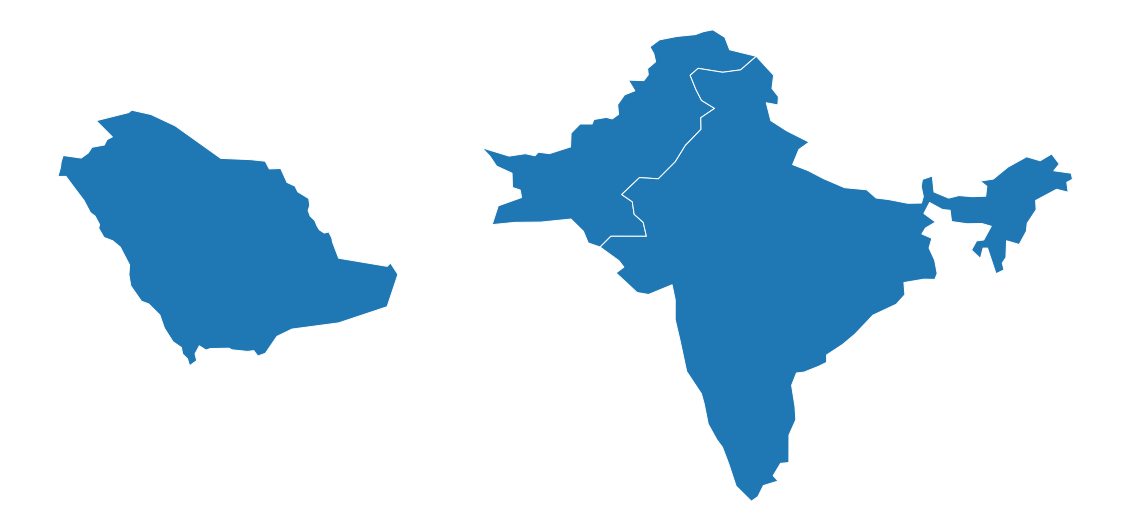

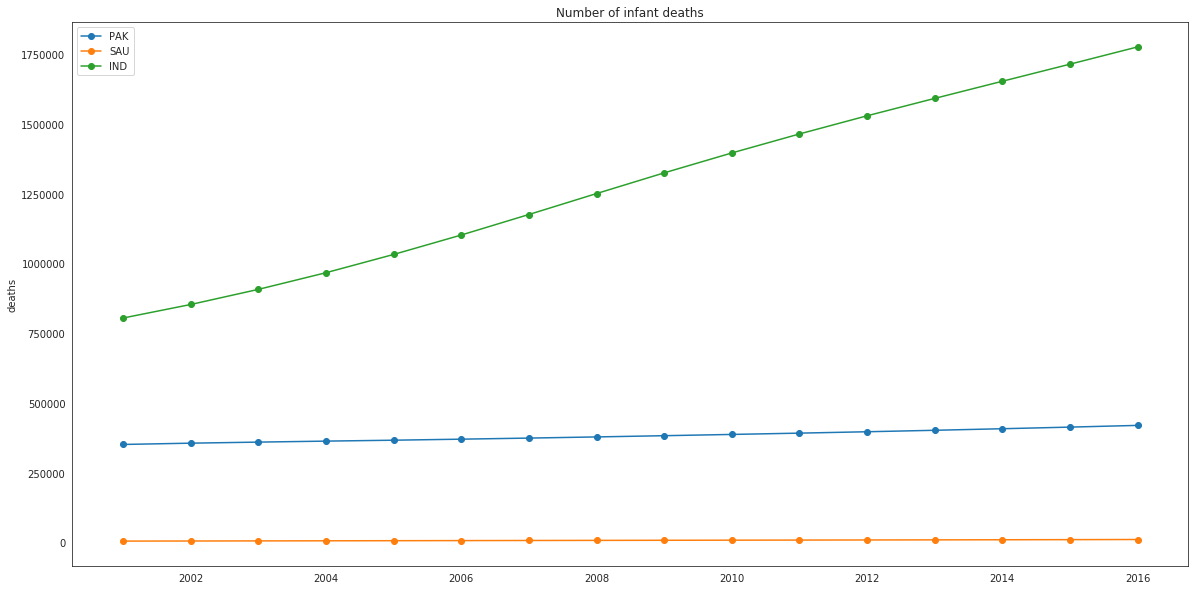

In [25]:
plot_data(indicator, ['PAK','SAU','IND'], 2001, 2016)

In [27]:
data.head()

,country,date,values
0,India,2015,852225.0
1,India,2014,906429.0
2,India,2013,966160.0
3,India,2012,1031595.0
4,India,2011,1101251.0


In [58]:
df.head()

,id,name,geometry
0,AFG,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6..."
2,ALB,Albania,"POLYGON ((20.59025 41.85540, 20.46317 41.51509..."
3,ARE,United Arab Emirates,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,ARG,Argentina,"MULTIPOLYGON (((-65.50000 -55.20000, -66.45000..."


In [103]:
li = []
df2 = pd.DataFrame(df)
countries = ['Iran', 'India']
for country in countries:
    c = df2[df2['name']==country]['id'].to_string(index=False)
    c = c.strip()
    li.append(c)
li

['IRN', 'IND']

In [105]:
def cunt(df,n):
    return df[df['name']==n]['id'].to_string(index=False).strip()